# Evolution of satellites orbiting the Earth

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Database

In this Database created and gathered by the union of scientists we have the specificatio of about 2800 satellites currently orbiting the earth.

After cleanning the data, I would like to take a closer look of the evolution of these satellites per type of satellite and spot, if any, their trend

NOTE: I had issues downoading the dataset directly from the website due to encoding.
I finally could overcome this issue by ading a 'latin' encoding to it.


In [5]:
sat = pd.read_csv('/Users/ajiacovic/Downloads/UCS-Satellite-Database-8-1-2020.txt', sep='\t', encoding='latin-1')


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#Dropping added columns filled with NaN

sat.drop(sat.columns[sat.columns.str.contains('Unnamed:',case = False)],axis = 1, inplace = True)

In [7]:
# I notice that the database has also 3 corrupted lines at the end. I will be dropping these as well:

sat.drop(sat.tail(3).index,inplace=True)

In [9]:
sat.head()
sat.tail(4)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5
2783,Ziyuan 1-2D,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2019-059A,44528.0,Hyperspectral imaging,JMSatcat/11_19,https://spaceflightnow.com/2019/09/12/china-la...,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN
2784,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2012-001A,38046.0,Land survey satellite.,www.spacedebris.net 12/12,http://www.spaceflightnow.com/news/n1201/09lon...,https://spacenews.com/china-launches-five-comm...,NaN,NaN,NaN,NaN
2785,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2016-033A,41556.0,Thought to be for intelligence gathering.,Space50,http://spaceflightnow.com/2016/05/31/long-marc...,https://www.planet4589.org/space/log/satcat.txt,http://space50.org/objekt.php?mot=2016-033A&ja...,NaN,NaN,NaN
2786,Ziyuan 3-3,Ziyuan 3-3,NR (7/20),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2020-051A,45939.0,Land survey satellite. Provide data for the co...,ZARYA,https://spaceflightnow.com/2020/07/25/china-la...,http://www.lib.cas.cz/space.40/2011/079A.HTM,NaN,NaN,NaN,NaN


In [10]:
#Let's now get acquainted with the dataset:
sat.info()

#From this I see there are some missing data on some of the specs I would like to analyse. 
#Need ot look further into that
#Sources don't seem to be relevant for the purpose of this analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 2786
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  2787 non-null   object 
 1   Current Official Name of Satellite  2787 non-null   object 
 2   Country/Org of UN Registry          2787 non-null   object 
 3   Country of Operator/Owner           2787 non-null   object 
 4   Operator/Owner                      2787 non-null   object 
 5   Users                               2787 non-null   object 
 6   Purpose                             2787 non-null   object 
 7   Detailed Purpose                    797 non-null    object 
 8   Class of Orbit                      2787 non-null   object 
 9   Type of Orbit                       2162 non-null   object 
 10  Longitude of GEO (degrees)          2787 non-null   float64
 11  Perigee (km)                        2787 no

In [17]:
sat.drop(sat.columns[sat.columns.str.contains('Source',case = False)],axis = 1, inplace = True)

In [21]:
missing_values = sat.isnull().sum().sort_values(ascending=False)
missing_values[:7] #the columns with missing values

#To look into following relevant columns with high missing values:

#Dry Mass(vs. LaunchMass)
#Launch Mass (less missing values)
#Power 
#Expected lifetime, 
#Type of Orbit (vs.Class of Orbit)


Dry Mass (kg.)              2344
Power (watts)               2184
Detailed Purpose            1990
Expected Lifetime (yrs.)    1639
Comments                    1375
Type of Orbit                625
Launch Mass (kg.)            207
dtype: int64

In [27]:
#Let's plot this data 
# sns.pairplot(data= sat)

In [81]:
#Type of Orbits
# print(sat['Type of Orbit'].value_counts())
# sat['Type of Orbit'].hist(figsize=(15,12))
#3 major types (counting polar) I believe class of orbit represents better 

LEO           2032
GEO            560
MEO            137
Elliptical      58
Name: Class of Orbit, dtype: int64


<AxesSubplot:>

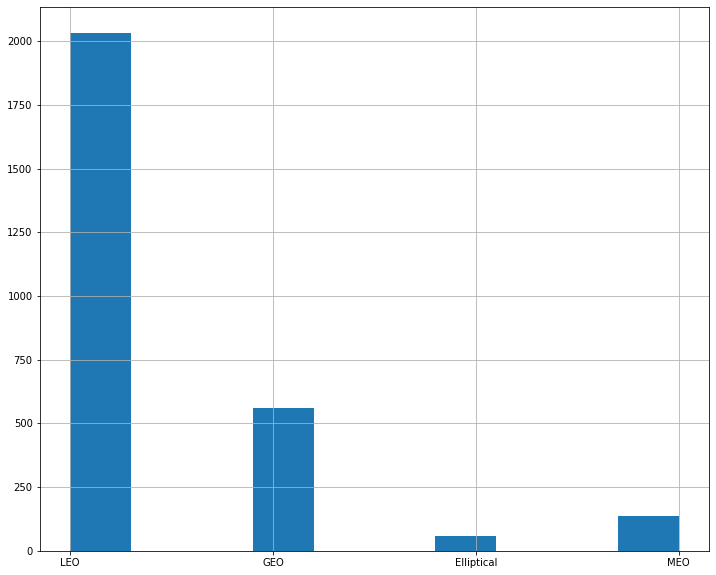

In [80]:
#Class of Orbit
print(sat['Class of Orbit'].value_counts())
sat['Class of Orbit'].hist(figsize=(12,10))

#LEO: Low Eliptic Orbit

<AxesSubplot:xlabel='Country of Operator/Owner'>

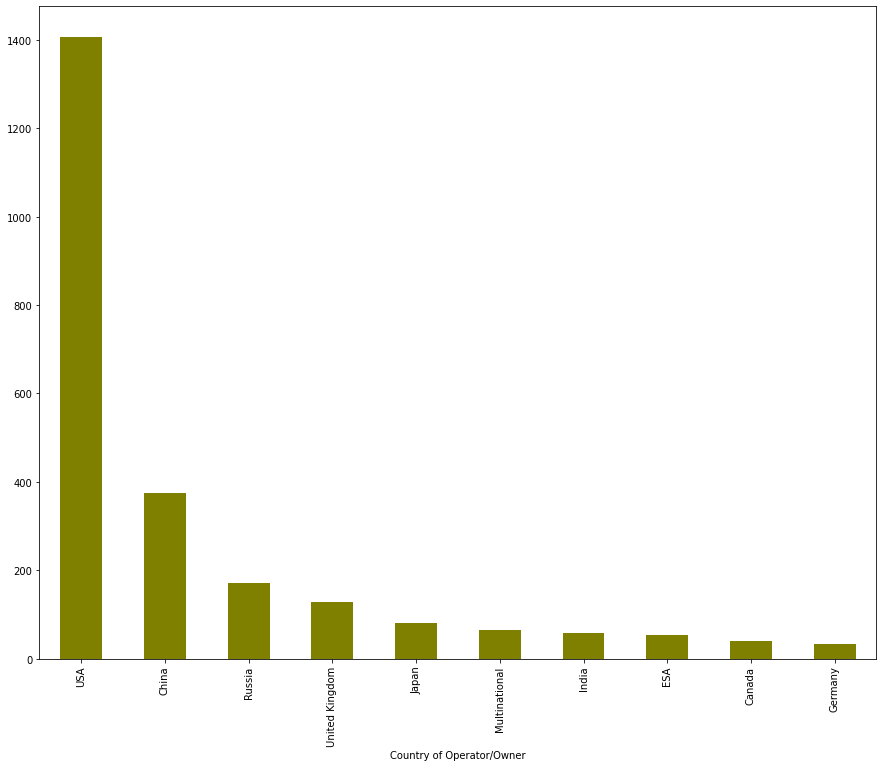

In [89]:
#per Country

sats_country = sat.groupby(['Country of Operator/Owner'])['Name of Satellite, Alternate Names'].agg('count').sort_values(ascending=False)[:10]
sats_country.plot.bar(figsize=(15,12), color = 'olive')

#Note:
#The home country identified with the operator/owner given in column D, i.e., the country that operates 
#or owns the satellite or the home country of the business entity that does so. If this includes three 
#or fewer countries, each is listed; otherwise the project is simply designated as Multinational. 
#An exception to this is projects of the European Space Agency (ESA), which represent the joint efforts 
#of its 15 member states and are designated as ESA.

<AxesSubplot:xlabel='Country of Operator/Owner,Class of Orbit'>

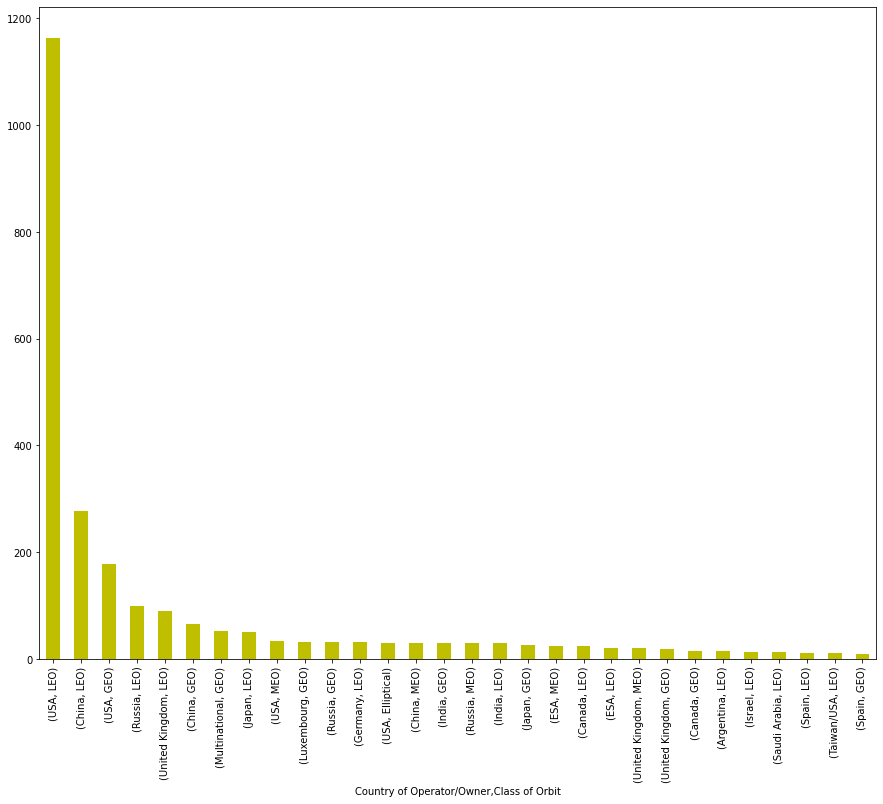

In [97]:
sats_country = sat.groupby(['Country of Operator/Owner','Class of Orbit'])['Name of Satellite, Alternate Names'].agg('count').sort_values(ascending=False)[:30]
sats_country.plot.bar(figsize=(15,12), color = 'y')

In [107]:
#per users

sats_users = sat.groupby(['Country of Operator/Owner','Users'])['Name of Satellite, Alternate Names'].agg('count').sort_values(ascending=False)[:30]
sats_users
#The affiliation of the primary users of the satellite is described with one or more of the keywords: civil (academic, amateur), commercial, 
#government (meteorological, scientific, etc.), military. Satellites can be multi-use, hosting, for example, dedicated transponders for both 
#commercial and military applications.

Country of Operator/Owner  Users                
USA                        Commercial               998
                           Military                 169
China                      Government               139
United Kingdom             Commercial               120
China                      Commercial                93
USA                        Government/Commercial     81
Russia                     Military                  72
USA                        Government                66
China                      Military                  62
                           Military/Government       52
India                      Government                45
Multinational              Commercial                42
Japan                      Government                33
USA                        Military/Commercial       33
Russia                     Military/Commercial       32
USA                        Civil                     31
Luxembourg                 Commercial                30

In [ ]:
#per launch
